In [3]:
import pandas as pd
from ast import literal_eval

In [41]:
movies_metadata = pd.read_csv("data/movies_metadata.csv")
links_small = pd.read_csv("data/links_small.csv")
movies_keywords = pd.read_csv("data/keywords.csv")

C:\Users\C414\AppData\Local\Temp\ipykernel_18428\2417491277.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("data/movies_metadata.csv")


In [42]:
print(links_small.columns)

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [43]:
print(links_small.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [44]:
links_small.shape
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
movies_metadata = movies_metadata[movies_metadata['id'].isin(links_small.astype('str'))]

In [45]:
movies_metadata.head()
# ['id','title','genres','popularity','release_date']

movies = movies_metadata[['id', 'title', 'genres', 'popularity', 'release_date']]

In [46]:
movies

,id,title,genres,popularity,release_date
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,1995-10-30
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,1995-12-15
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,1995-12-22
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.387519,1995-02-10
...,...,...,...,...,...
40224,315011,Shin Godzilla,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9.285519,2016-07-29
40503,391698,The Beatles: Eight Days a Week - The Touring Y...,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",7.078301,2016-09-15
44821,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.480376,2000-07-08
44826,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.080108,2001-07-06


In [48]:
movies_keywords.shape
movies_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# movies['id']
# movies_keywords['id'] = movies_keywords['id'].astype('str')
# movies_keywords['id']

movies = movies.merge(movies_keywords,on='id')

In [54]:
movies.head()

,id,title,genres,popularity,release_date,keywords_x,keywords_y,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,1995-10-30,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,1995-12-15,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,1995-12-22,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.387519,1995-02-10,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# 영화 데이터셋의 genres(장르) 컬럼에 저장된 문자열 형태의 리스트 데이터를 실제 파이썬 리스트로 변환하고, 장르 이름만 뽑아 가나다순(알파벳순)으로 정렬
#fillna['[]'] : 장르정보가 비어있는 행에 빈리스트 문자열[]을 넣음
# .apply(literal_eval) : 데이터셋에서 장르 데이터는 보통 '[{"id": 28, "name": "Action"}, ...]' 처럼 텍스트(문자열) 형태로 저장되어 있습니다. 
#                       ast.literal_eval 함수를 사용하여 이 문자열을 실제 파이썬의 리스트와 딕셔너리 구조로 해석해줍니다
# .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else []) 
# : i['name'] for i in x: 리스트 안에 있는 여러 딕셔너리에서 장르의 이름('name') 값만 추출합니다. (예: Action, Comedy 등)
#   sorted(...): 추출된 장르 이름들을 알파벳 순서대로 정렬합니다. 이는 나중에 "Action, Comedy"와 "Comedy, Action"을 동일하게 취급하기 위함입니다.
#   if isinstance(x, list) else []: 데이터 타입이 리스트인 경우에만 위 작업을 수행하고, 혹시라도 잘못된 데이터가 있으면 빈 리스트를 반환하여 에러를 방지합니다.


movies['genres'] = movies['genres'].fillna('[]') \
                    .apply(literal_eval) \
                    .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else [])

In [56]:
movies['genres']

0        [Animation, Comedy, Family]
1       [Adventure, Family, Fantasy]
2                  [Comedy, Romance]
3           [Comedy, Drama, Romance]
4                           [Comedy]
                    ...             
9458                 [Comedy, Drama]
9459                 [Comedy, Drama]
9460                 [Comedy, Drama]
9461                 [Comedy, Drama]
9462                 [Comedy, Drama]
Name: genres, Length: 9463, dtype: object

In [57]:
movies['keywords'] = movies['keywords'].fillna('[]') \
                    .apply(literal_eval) \
                    .apply(lambda x: sorted( i['name'] for i in x) if isinstance(x,list) else [])
movies['keywords']

0       [boy, boy next door, friends, friendship, jeal...
1       [based on children's book, board game, disappe...
2       [best friend, duringcreditsstinger, fishing, o...
3       [based on novel, chick flick, divorce, interra...
4       [aging, baby, confidence, contraception, daugh...
                              ...                        
9458    [avalanche, dark comedy, family vacation, fema...
9459    [avalanche, dark comedy, family vacation, fema...
9460    [avalanche, dark comedy, family vacation, fema...
9461    [avalanche, dark comedy, family vacation, fema...
9462    [avalanche, dark comedy, family vacation, fema...
Name: keywords, Length: 9463, dtype: object

In [60]:
# 장르와 키워드를 붙임
movies['str_genres_keywords'] = movies['genres'] + movies['keywords']

In [61]:
movies[['genres', 'keywords', 'str_genres_keywords']]

,genres,keywords,str_genres_keywords
0,"[Animation, Comedy, Family]","[boy, boy next door, friends, friendship, jeal...","[Animation, Comedy, Family, boy, boy next door..."
1,"[Adventure, Family, Fantasy]","[based on children's book, board game, disappe...","[Adventure, Family, Fantasy, based on children..."
2,"[Comedy, Romance]","[best friend, duringcreditsstinger, fishing, o...","[Comedy, Romance, best friend, duringcreditsst..."
3,"[Comedy, Drama, Romance]","[based on novel, chick flick, divorce, interra...","[Comedy, Drama, Romance, based on novel, chick..."
4,[Comedy],"[aging, baby, confidence, contraception, daugh...","[Comedy, aging, baby, confidence, contraceptio..."
...,...,...,...
9458,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family..."
9459,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family..."
9460,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family..."
9461,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family..."


In [63]:
# sort
movies['str_genres_keywords'] = movies['str_genres_keywords'] \
                                .apply(lambda x:sorted(list(x))) \
                                .apply(lambda x: " ".join(x) if len(x) > 0 else None)


In [64]:
movies[['genres', 'keywords', 'str_genres_keywords']]

,genres,keywords,str_genres_keywords
0,"[Animation, Comedy, Family]","[boy, boy next door, friends, friendship, jeal...",Animation Comedy Family boy boy next door frie...
1,"[Adventure, Family, Fantasy]","[based on children's book, board game, disappe...",Adventure Family Fantasy based on children's b...
2,"[Comedy, Romance]","[best friend, duringcreditsstinger, fishing, o...",Comedy Romance best friend duringcreditsstinge...
3,"[Comedy, Drama, Romance]","[based on novel, chick flick, divorce, interra...",Comedy Drama Romance based on novel chick flic...
4,[Comedy],"[aging, baby, confidence, contraception, daugh...",Comedy aging baby confidence contraception dau...
...,...,...,...
9458,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...",Comedy Drama avalanche dark comedy family vaca...
9459,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...",Comedy Drama avalanche dark comedy family vaca...
9460,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...",Comedy Drama avalanche dark comedy family vaca...
9461,"[Comedy, Drama]","[avalanche, dark comedy, family vacation, fema...",Comedy Drama avalanche dark comedy family vaca...


In [65]:
movies[['genres', 'keywords', 'str_genres_keywords']].iloc[0]

genres                                       [Animation, Comedy, Family]
keywords               [boy, boy next door, friends, friendship, jeal...
str_genres_keywords    Animation Comedy Family boy boy next door frie...
Name: 0, dtype: object

In [68]:
movies[['str_genres_keywords']].iloc[0].values[0]

'Animation Comedy Family boy boy next door friends friendship jealousy new toy rivalry toy toy comes to life'

In [69]:
# 개봉일 전처리
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   9463 non-null   object
 1   title                9463 non-null   object
 2   genres               9463 non-null   object
 3   popularity           9463 non-null   object
 4   release_date         9463 non-null   object
 5   keywords_x           9463 non-null   object
 6   keywords_y           9463 non-null   object
 7   keywords             9463 non-null   object
 8   str_genres_koywords  9463 non-null   object
 9   str_genres_keywords  9436 non-null   object
dtypes: object(10)
memory usage: 739.4+ KB


In [70]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [71]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9463 non-null   object        
 1   title                9463 non-null   object        
 2   genres               9463 non-null   object        
 3   popularity           9463 non-null   object        
 4   release_date         9463 non-null   datetime64[ns]
 5   keywords_x           9463 non-null   object        
 6   keywords_y           9463 non-null   object        
 7   keywords             9463 non-null   object        
 8   str_genres_koywords  9463 non-null   object        
 9   str_genres_keywords  9436 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 739.4+ KB


In [72]:
movies['year'] = movies['release_date'].dt.year

In [73]:
movies

,id,title,genres,popularity,release_date,keywords_x,keywords_y,keywords,str_genres_koywords,str_genres_keywords,year
0,862,Toy Story,"[Animation, Comedy, Family]",21.946943,1995-10-30,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[boy, boy next door, friends, friendship, jeal...","[Animation, Comedy, Family, boy, boy next door...",Animation Comedy Family boy boy next door frie...,1995
1,8844,Jumanji,"[Adventure, Family, Fantasy]",17.015539,1995-12-15,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[based on children's book, board game, disappe...","[Adventure, Family, Fantasy, based on children...",Adventure Family Fantasy based on children's b...,1995
2,15602,Grumpier Old Men,"[Comedy, Romance]",11.7129,1995-12-22,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[best friend, duringcreditsstinger, fishing, o...","[Comedy, Romance, best friend, duringcreditsst...",Comedy Romance best friend duringcreditsstinge...,1995
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",3.859495,1995-12-22,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[based on novel, chick flick, divorce, interra...","[Comedy, Drama, Romance, based on novel, chick...",Comedy Drama Romance based on novel chick flic...,1995
4,11862,Father of the Bride Part II,[Comedy],8.387519,1995-02-10,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[aging, baby, confidence, contraception, daugh...","[Comedy, aging, baby, confidence, contraceptio...",Comedy aging baby confidence contraception dau...,1995
...,...,...,...,...,...,...,...,...,...,...,...
9458,265189,Force Majeure,"[Comedy, Drama]",12.165685,2014-08-15,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'id': 293, 'name': 'female nudity'}, {'id': ...","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family...",Comedy Drama avalanche dark comedy family vaca...,2014
9459,265189,Force Majeure,"[Comedy, Drama]",12.165685,2014-08-15,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'id': 293, 'name': 'female nudity'}, {'id': ...","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family...",Comedy Drama avalanche dark comedy family vaca...,2014
9460,265189,Force Majeure,"[Comedy, Drama]",12.165685,2014-08-15,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'id': 293, 'name': 'female nudity'}, {'id': ...","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family...",Comedy Drama avalanche dark comedy family vaca...,2014
9461,265189,Force Majeure,"[Comedy, Drama]",12.165685,2014-08-15,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'id': 293, 'name': 'female nudity'}, {'id': ...","[avalanche, dark comedy, family vacation, fema...","[Comedy, Drama, avalanche, dark comedy, family...",Comedy Drama avalanche dark comedy family vaca...,2014


In [74]:
movies['popularity'].head()

0    21.946943
1    17.015539
2      11.7129
3     3.859495
4     8.387519
Name: popularity, dtype: object

In [75]:
movies['popularity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9463 entries, 0 to 9462
Series name: popularity
Non-Null Count  Dtype 
--------------  ----- 
9463 non-null   object
dtypes: object(1)
memory usage: 74.1+ KB


In [77]:
# 숫자형태로 변환
movies['popularity'] = movies['popularity'].astype(float)

In [78]:
movies['popularity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9463 entries, 0 to 9462
Series name: popularity
Non-Null Count  Dtype  
--------------  -----  
9463 non-null   float64
dtypes: float64(1)
memory usage: 74.1 KB


In [79]:
movies['popularity'].describe()

count    9463.000000
mean        7.236567
std         9.282913
min         0.000004
25%         2.847367
50%         6.386873
75%         9.839455
max       547.488298
Name: popularity, dtype: float64

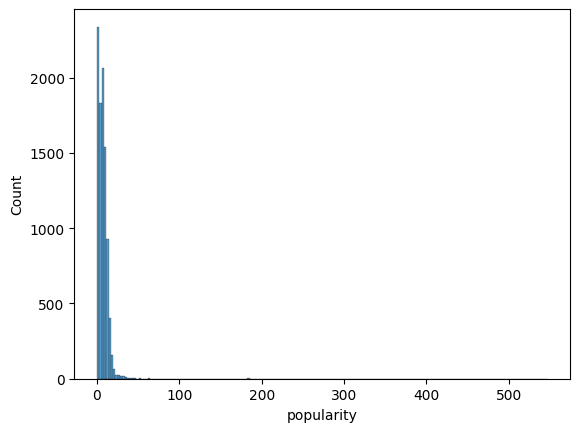

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(movies['popularity'])
plt.show()

In [ ]:
# 챠트가 쏠림이 심하므로 log로 변환해서 표준화
# 10^3 = log10(1000) = 3

In [81]:
import numpy as np
movies['popularity_log'] = np.log(movies['popularity'])



In [82]:
movies[['popularity','popularity_log']].describe

<bound method NDFrame.describe of       popularity  popularity_log
0      21.946943        3.088628
1      17.015539        2.834127
2      11.712900        2.460691
3       3.859495        1.350536
4       8.387519        2.126745
...          ...             ...
9458   12.165685        2.498619
9459   12.165685        2.498619
9460   12.165685        2.498619
9461   12.165685        2.498619
9462   12.165685        2.498619

[9463 rows x 2 columns]>

<Axes: xlabel='popularity_log', ylabel='Count'>

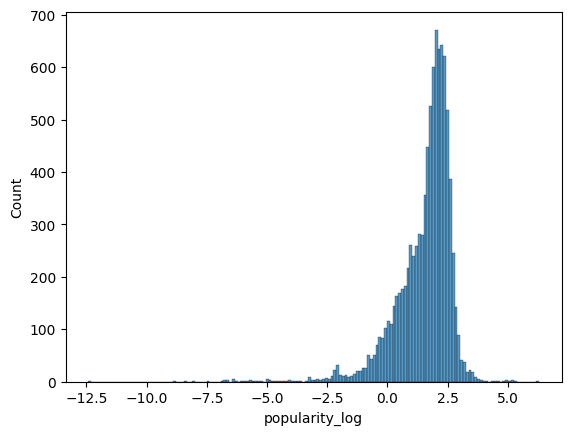

In [83]:
sns.histplot(movies['popularity_log'])

In [84]:
# 결측치 test
movies.isnull().sum()

id                      0
title                   0
genres                  0
popularity              0
release_date            0
keywords_x              0
keywords_y              0
keywords                0
str_genres_koywords     0
str_genres_keywords    27
year                    0
popularity_log          0
dtype: int64

In [85]:
movies  = movies.dropna().reset_index(drop=True)

In [86]:
movies.isnull().sum()

id                     0
title                  0
genres                 0
popularity             0
release_date           0
keywords_x             0
keywords_y             0
keywords               0
str_genres_koywords    0
str_genres_keywords    0
year                   0
popularity_log         0
dtype: int64

### TF-IDF 기반 Contents based Filtering

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_mat = tfidf_vectorizer.fit_transform(movies['str_genres_keywords'])
arr_tfidf = tfidf_mat.toarray()

arr_tfidf.shape

(9436, 9008)

In [ ]:
### Euclidean Distances(유클리드 거리)

In [88]:
from sklearn.metrics.pairwise import euclidean_distances

In [89]:
similarity_of_euclidean = euclidean_distances(arr_tfidf, arr_tfidf)
similarity_of_euclidean

array([[0.        , 1.38649285, 1.40814599, ..., 1.39545491, 1.39545491,
        1.39545491],
       [1.38649285, 0.        , 1.41421356, ..., 1.39600771, 1.39600771,
        1.39600771],
       [1.40814599, 1.41421356, 0.        , ..., 1.40317742, 1.40317742,
        1.40317742],
       ...,
       [1.39545491, 1.39600771, 1.40317742, ..., 0.        , 0.        ,
        0.        ],
       [1.39545491, 1.39600771, 1.40317742, ..., 0.        , 0.        ,
        0.        ],
       [1.39545491, 1.39600771, 1.40317742, ..., 0.        , 0.        ,
        0.        ]], shape=(9436, 9436))

In [90]:
similarity_of_euclidean.shape

(9436, 9436)